<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2023-08-13 14:57:11--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2023-08-13 14:57:11--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2023-08-13 14:57:11 (4.55 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2023-08-13 14:57:11--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.01s (4.55 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [9]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv('titanic.csv')
nan_all = df.isna().sum()
print(nan_all)
des = df.describe()
des.loc['NaN'] = df.isna().sum()
des.loc['%NaN'] = df.isna().mean()*100
des

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
NaN,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%NaN,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [12]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.shape
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df1 = df.copy()
df1 = df1[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [15]:
df1.shape

(891, 6)

In [17]:
# Alumno, elimine aquellas filas que tengan columnas vacias
df1.dropna(subset=['Age'], inplace=True)

In [18]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df1.shape

(714, 6)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [19]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


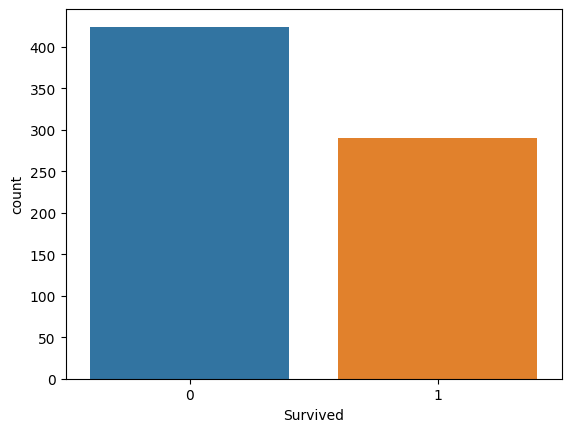

0    424
1    290
Name: Survived, dtype: int64

In [30]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
sns.countplot(data=df1, x='Survived')
plt.show()
df1['Survived'].value_counts()

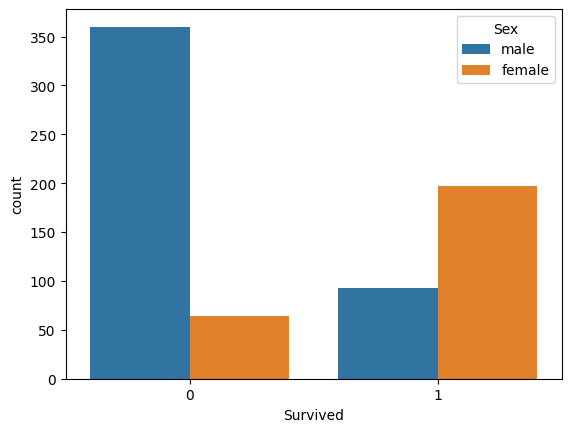

Pclass  Age  SibSp  Parch
Survived Sex                              
0        female      64   64     64     64
         male       360  360    360    360
1        female     197  197    197    197
         male        93   93     93     93

In [60]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(data=df1, x='Survived', hue='Sex')
plt.show()

df1.groupby(['Survived', 'Sex']).count()

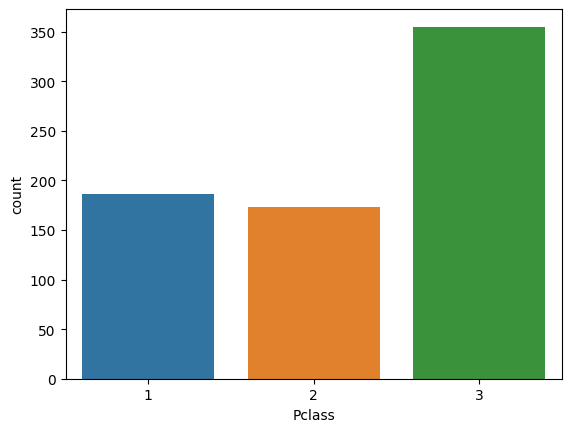

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [34]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(data=df1, x='Pclass')
plt.show()

df1['Pclass'].value_counts()

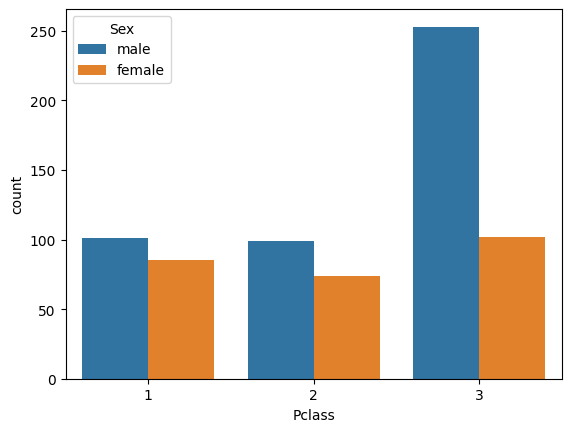

Survived  Age  SibSp  Parch
Pclass Sex                                
1      female        85   85     85     85
       male         101  101    101    101
2      female        74   74     74     74
       male          99   99     99     99
3      female       102  102    102    102
       male         253  253    253    253

In [59]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df1, x='Pclass', hue='Sex')
plt.show()

df1.groupby(['Pclass', 'Sex']).count()
# print('Survived: \n', df1[df1['Survived']== 1]['Sex'].value_counts())

#### Transformar variables categóricas texto a clases numeradas

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df1.copy()

In [66]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()

le_sex= le.fit_transform(df_cod['Sex'])
df_cod['Sex_le'] = le_sex

In [65]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
print(le.classes_)

['female' 'male']


In [77]:
df2 = df_cod.copy()
df2 = df2.drop('Sex', axis=1)
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_le
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [78]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

X = df2.drop('Survived', axis=1)
y = df2['Survived']

In [79]:
print(X.head())

   Pclass   Age  SibSp  Parch  Sex_le
0       3  22.0      1      0       1
1       1  38.0      1      0       0
2       3  26.0      0      0       0
3       1  35.0      1      0       0
4       3  35.0      0      0       1


Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [80]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [81]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [82]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)


0.794

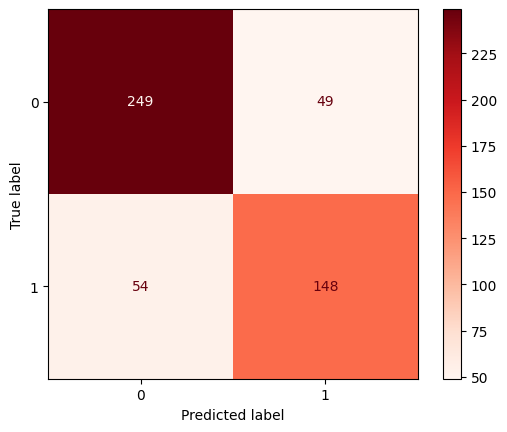

In [83]:
# Alumno, dibujar la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Reds)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [93]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

df_prueba = pd.DataFrame({"Pclass":[3],"Age": [60], "Sex": ["female"], "SibSp": [1], "Parch": [1]})
df_prueba

,Pclass,Age,Sex,SibSp,Parch
0,3,60,female,1,1


In [94]:
le_transform_sex = le.transform(df_prueba['Sex'])
df_prueba = df_prueba.join(pd.DataFrame(le_transform_sex, columns=['Sex_le'], dtype=int))
df_prueba = df_prueba.drop('Sex', axis=1)
df_prueba

,Pclass,Age,SibSp,Parch,Sex_le
0,3,60,1,1,0


In [95]:
y_hat_prueba = clf.predict(df_prueba)
y_hat_prueba

array([1])